In [1]:
# 数据导入
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


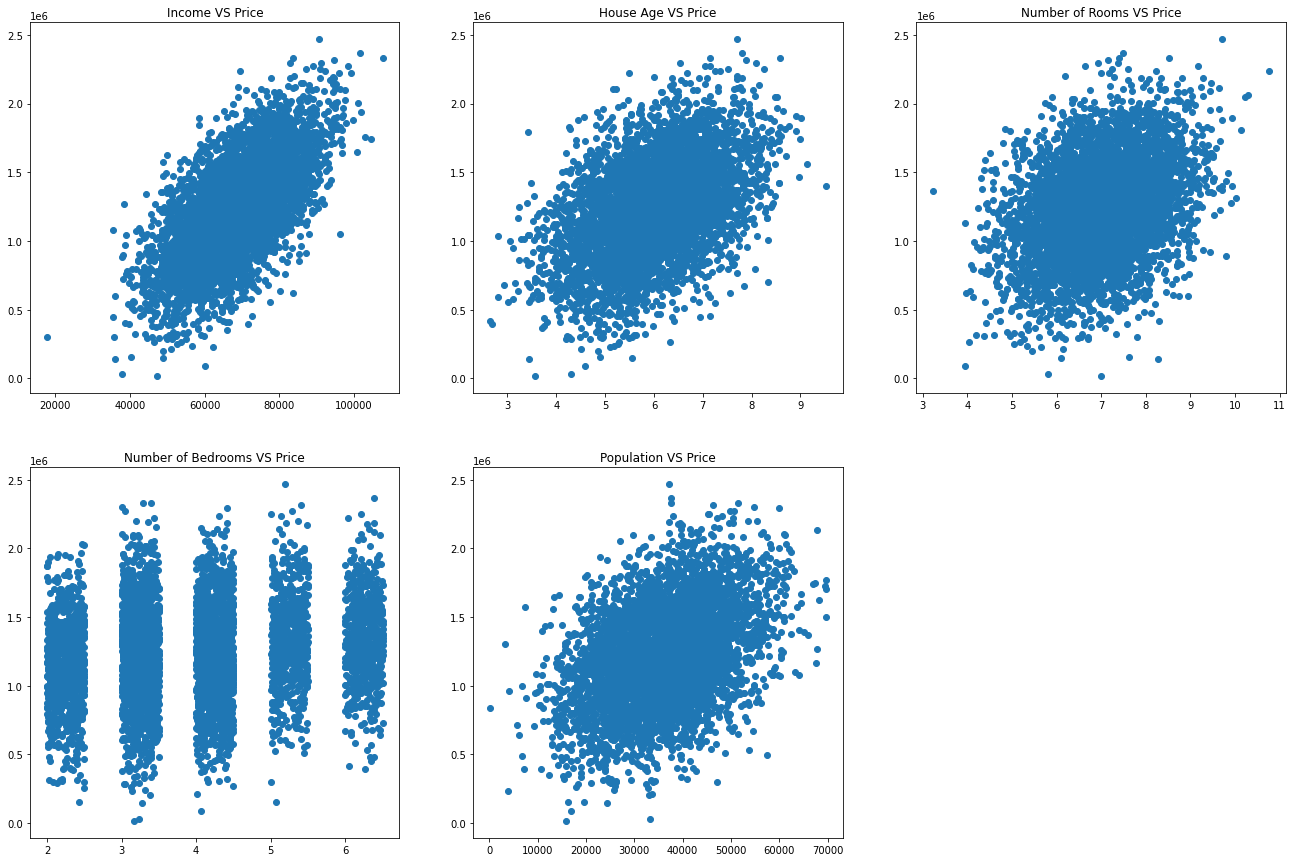

In [2]:
# 数据展示
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(22.5,15))

fig1 = plt.subplot(231)
plt.scatter(data.loc[:, 'Avg. Area Income'], data.loc[:, 'Price'])
plt.title('Income VS Price')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:, 'Avg. Area House Age'], data.loc[:, 'Price'])
plt.title('House Age VS Price')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], data.loc[:, 'Price'])
plt.title('Number of Rooms VS Price')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:, 'Avg. Area Number of Bedrooms'], data.loc[:, 'Price'])
plt.title('Number of Bedrooms VS Price')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:, 'Area Population'], data.loc[:, 'Price'])
plt.title('Population VS Price')

plt.show()

In [16]:
# 建立单因子模型 -- 以卧室数量为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果
x = data.loc[:, 'Avg. Area Income']
y = data.loc[:, 'Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [17]:
x = np.array(x).reshape(-1, 1)
print(x.shape)

(5000, 1)


In [18]:
# 单因子线性回归
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(x, y)

LinearRegression()

In [20]:
y_predict_1 = LR1.predict(x)
print(y_predict_1)

[1464424.95032392 1458133.78924722 1077429.52286549 ... 1122016.75902953
 1219741.59376302 1166948.9559213 ]


In [22]:
# MSE 和 R2
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error_1 = mean_absolute_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)
print(mean_absolute_error_1, r2_score_1)

217320.4825741804 0.40925930704314073


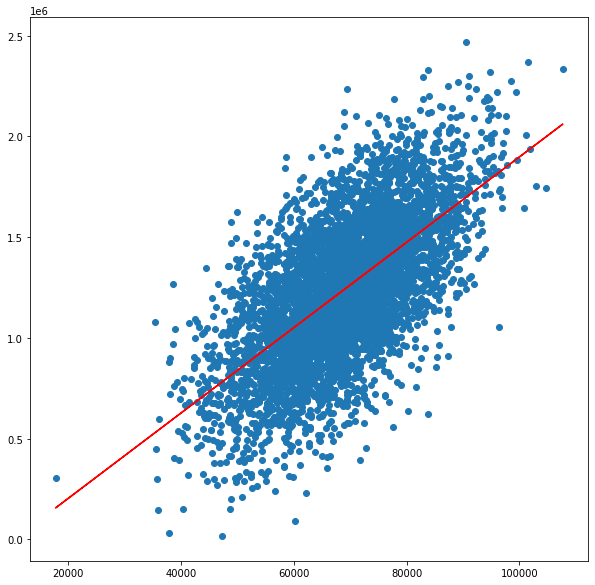

In [24]:
# 可视化线性回归预测结果
fig6 = plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.plot(x, y_predict_1, 'r')
plt.show()

In [25]:
# 建立多因子模型 -- 以人均收入、房屋年龄、房间数量、卧室数量、人口数量为输入变量，建立多因子模型，评估模型表现
x_multi = data.drop(['Price'], axis=1)
x_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [26]:
# 多因子线性回归
LR_multi = LinearRegression()
LR_multi.fit(x_multi, y)

LinearRegression()

In [30]:
y_predict_multi = LR_multi.predict(x_multi)

In [31]:
# MSE 和 R2
mean_absolute_error_multi = mean_absolute_error(y, y_predict_multi)
r2_score_multi = r2_score(y, y_predict_multi)
print(mean_absolute_error_multi, r2_score_multi)

81359.2702252271 0.9180238195119546


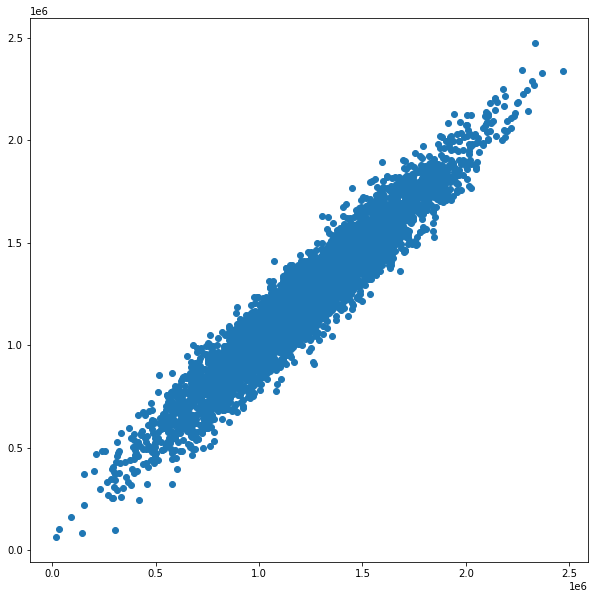

In [32]:
# 可视化线性回归预测结果
fig7 = plt.figure(figsize=(10, 10))
plt.scatter(y, y_predict_multi)
plt.show()

In [33]:
# 预测数据
x_test = [65000, 5, 5, 5, 30000]
x_test = np.array(x_test).reshape(1, -1)
x_test

array([[65000,     5,     5,     5, 30000]])

In [34]:
# 预测结果
y_test = LR_multi.predict(x_test)
y_test

array([661037.07258424])